In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv("Datasets/breach_report.csv")
df.head()

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,CO,Healthcare Provider,26609,Hacking/IT Incident,Email,No
1,WI,Healthcare Provider,907,Unauthorized Access/Disclosure,Email,No
2,NH,Healthcare Provider,34878,Hacking/IT Incident,Network Server,No
3,CA,Healthcare Provider,500,Theft,Paper/Films,No
4,OH,Healthcare Provider,2716,Hacking/IT Incident,"Laptop, Network Server",No


In [28]:
# This cell will focus on the preprocessing of the state column
# There are 49 states present within the data setet... 50 including the nan states
# We will be assign a unique 0 - 49 value to each state present and then check the data to ensure we have messed up anything
# df.State.unique()
df['State'] = df['State'].map({
    'CO': 0,
    'WI': 1,
    'NH': 2,
    'CA': 3,
    'OH': 4,
    'AZ': 5,
    'AR': 6,
    'WA': 7,
    'MI': 8,
    'PA': 9,
    'TX': 10,
    'ID': 11,
    'OR': 12,
    'MN': 13,
    'MO': 14,
    'MA': 15,
    'UT': 16,
    'VA': 17,
    'TN': 18,
    'WY': 19,
    'FL': 20,
    'ND': 21,
    'KY': 22,
    'NC': 23,
    'IA': 24,
    'GA': 25,
    'NV': 26,
    'LA': 27,
    'VT': 28,
    'AL': 29,
    'MD': 30,
    'NY': 31,
    'SC': 32,
    'IN': 33,
    'IL': 34,
    'WV': 35,
    'DE': 36,
    'CT': 37,
    'MS': 38,
    'NE': 39,
    'ME': 40,
    'NM': 41,
    'DC': 42,
    'HI': 43,
    'NJ': 44,
    'OK': 45,
    'AK': 46,
    'KS': 47,
    'MT': 48,
    'nan': 49
}.get)
df.head()

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,0.0,Healthcare Provider,26609,Hacking/IT Incident,Email,No
1,1.0,Healthcare Provider,907,Unauthorized Access/Disclosure,Email,No
2,2.0,Healthcare Provider,34878,Hacking/IT Incident,Network Server,No
3,3.0,Healthcare Provider,500,Theft,Paper/Films,No
4,4.0,Healthcare Provider,2716,Hacking/IT Incident,"Laptop, Network Server",No


In [29]:
df['Covered Entity Type'] = df['Covered Entity Type'].map({
    'Healthcare Provider': 0,
    'Business Associate': 1,
    'Health Plan': 2,
    'Healthcare Clearing House': 3,
}.get)
df.head()

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,0.0,0,26609,Hacking/IT Incident,Email,No
1,1.0,0,907,Unauthorized Access/Disclosure,Email,No
2,2.0,0,34878,Hacking/IT Incident,Network Server,No
3,3.0,0,500,Theft,Paper/Films,No
4,4.0,0,2716,Hacking/IT Incident,"Laptop, Network Server",No


In [31]:
# df['Type of Breach'].unique()
df['Type of Breach'] = df['Type of Breach'].map({
    'Hacking/IT Incident': 0,
    'Unauthorized Access/Disclosure': 1,
    'Theft': 2,
    'Loss': 3,
    'Improper Disposal': 4
}.get)
df.head()

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,0.0,0,26609,0,Email,No
1,1.0,0,907,1,Email,No
2,2.0,0,34878,0,Network Server,No
3,3.0,0,500,2,Paper/Films,No
4,4.0,0,2716,0,"Laptop, Network Server",No


In [34]:
# df['Location of Breached Information'].unique()
df['Location of Breached Information'] = df['Location of Breached Information'].map({
    'Email': 0,
    'Network Server': 1,
    'Paper/Films': 2,
    'Laptop, Network Server': 3,
    'Other': 4,
    'Electronic Medical Record': 5,
    'Desktop Computer': 6,
    'Desktop Computer, Email': 7,
    'Laptop': 8,
    'Desktop Computer, Network Server': 9,
    'Desktop Computer, Electronic Medical Record, Network Server': 10,
    'Email, Network Server': 11,
    'Electronic Medical Record, Network Server': 12,
    'Other Portable Electronic Device': 13,
    'Other Portable Electronic Device, Paper/Films': 14,
    'Desktop Computer, Laptop, Other Portable Electronic Device': 15,
    'Desktop Computer, Laptop': 16,
    'Desktop Computer, Email, Network Server': 17,
    'Other, Other Portable Electronic Device': 18,
    'Network Server, Other': 19,
    'Other, Paper/Films': 20,
    'Electronic Medical Record, Email, Network Server': 21,
    'Desktop Computer, Network Server, Other Portable Electronic Device': 22,
    'Desktop Computer, Paper/Films': 23, 
    'Email, Paper/Films': 24,
    'Electronic Medical Record, Laptop, Other': 25,
    'Laptop, Other Portable Electronic Device': 26,
    'Desktop Computer, Email, Laptop, Network Server': 27,
    'Network Server, Other Portable Electronic Device': 28,
    'Desktop Computer, Email, Other': 29, 
    'Email, Other': 30,
    'Electronic Medical Record, Other': 31, 
    'Email, Laptop': 32,
    'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server': 33
}.get)

In [37]:
# df['Business Associate Present'].unique()
df['Business Associate Present'] = df['Business Associate Present'].map({
    'No': 0,
    'Yes': 1
}.get)
df.tail()

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
717,20.0,0,35000,1,5,0
718,12.0,0,2952,0,0,0
719,13.0,0,1200,0,0,0
720,25.0,0,278016,0,0,0
721,4.0,0,569,0,0,0


In [41]:
df['Individuals Affected'].min()

500

In [42]:
df['Individuals Affected'].max()

11500000

In [49]:
df['Individuals Affected'] = df['Individuals Affected'].apply(lambda v: ((v-df['Individuals Affected'].min())/(df['Individuals Affected'].max()-df['Individuals Affected'].min())))
df.head()

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,0.0,0,0.002270,0,0,0
1,1.0,0,0.000035,1,0,0
2,2.0,0,0.002990,0,1,0
3,3.0,0,0.000000,2,2,0
4,4.0,0,0.000193,0,3,0


In [45]:
df.cov()

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
State,157.365716,-0.350927,-0.008867,-0.103570,4.130181,0.286694
Covered Entity Type,-0.350927,0.415192,0.003343,0.000125,-0.128995,0.083821
Individuals Affected,-0.008867,0.003343,0.001746,-0.001696,-0.006579,0.001866
Type of Breach,-0.103570,0.000125,-0.001696,0.650245,0.975903,-0.025165
Location of Breached Information,4.130181,-0.128995,-0.006579,0.975903,28.514275,0.039957
Business Associate Present,0.286694,0.083821,0.001866,-0.025165,0.039957,0.214291


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

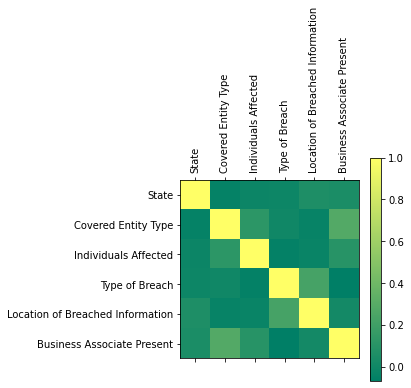

In [47]:
# matshow == matrix show
plt.matshow(df.corr(), cmap="summer")
plt.colorbar()

plt.xticks(list(range(len(df.columns))), df.columns, rotation='vertical')
plt.yticks(list(range(len(df.columns))), df.columns, rotation='horizontal')
# This is a simple correlation analysis -- I plan to grow into a larger set w/more data to see how all the attributes truly do correlate
plt.show()

In [48]:
df.to_csv("Datasets/Preprocessed-Datasets/preprocessed-breach-report.csv", index=False)